# Imports Libraries and Tools

In [27]:
import os
import numpy as np
import random
from PIL import Image, ImageEnhance
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Install MLflow
!pip install mlflow --quiet



In [28]:
import mlflow

# Set the tracking URI to your remote MLflow server
mlflow.set_tracking_uri("https://ml.reaai.me")


In [29]:
from google.colab import files
files.upload()  # upload your kaggle.json here

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle (1).json


In [30]:

!kaggle datasets download masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
brain-tumor-mri-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [31]:
path_to_zip_file = '/content/brain-tumor-mri-dataset.zip'
directory_to_extract_to = "./"
import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
  zip_ref.extractall(directory_to_extract_to)

In [32]:
import os
import shutil


dataset_dir = "/content/Training"


yes_folder = os.path.join(dataset_dir, "yes")


os.makedirs(yes_folder, exist_ok=True)

target_folders = ["glioma", "meningioma", "pituitary"]


total_moved = 0


for folder in target_folders:
    folder_path = os.path.join(dataset_dir, folder)

    if os.path.exists(folder_path):

        for root, dirs, files in os.walk(folder_path):
            for img in files:

                if not img.startswith('.'):
                    img_path = os.path.join(root, img)


                    dest_path = os.path.join(yes_folder, f"{folder}_{img}")

                    try:
                        shutil.copy2(img_path, dest_path)  # Copy instead of move
                        total_moved += 1
                    except Exception as e:
                        print(f"Error moving {img_path}: {e}")


        try:
            shutil.rmtree(folder_path)
            print(f"Deleted folder: {folder_path}")
        except Exception as e:
            print(f"Error deleting folder {folder_path}: {e}")

print(f"Total images moved: {total_moved}")
print("Image moving process completed!")

Deleted folder: /content/Training/glioma
Deleted folder: /content/Training/meningioma
Deleted folder: /content/Training/pituitary
Total images moved: 4117
Image moving process completed!


In [33]:
import os
import shutil


dataset_dir = "/content/Testing"


yes_folder = os.path.join(dataset_dir, "yes")


os.makedirs(yes_folder, exist_ok=True)

target_folders = ["glioma", "meningioma", "pituitary"]


total_moved = 0


for folder in target_folders:
    folder_path = os.path.join(dataset_dir, folder)

    if os.path.exists(folder_path):

        for root, dirs, files in os.walk(folder_path):
            for img in files:

                if not img.startswith('.'):
                    img_path = os.path.join(root, img)


                    dest_path = os.path.join(yes_folder, f"{folder}_{img}")

                    try:
                        shutil.copy2(img_path, dest_path)  # Copy instead of move
                        total_moved += 1
                    except Exception as e:
                        print(f"Error moving {img_path}: {e}")


        try:
            shutil.rmtree(folder_path)
            print(f"Deleted folder: {folder_path}")
        except Exception as e:
            print(f"Error deleting folder {folder_path}: {e}")

print(f"Total images moved: {total_moved}")
print("Image moving process completed!")

Deleted folder: /content/Testing/glioma
Deleted folder: /content/Testing/meningioma
Deleted folder: /content/Testing/pituitary
Total images moved: 906
Image moving process completed!


# Load Datasets

In [34]:
import os
from sklearn.utils import shuffle

# Set local directories for training and testing data
train_dir ="/content/Training"

test_dir = "/content/Testing"


# Load and shuffle the train data
train_paths = []
train_labels = []
for label in os.listdir(train_dir):
    label_path = os.path.join(train_dir, label)
    if os.path.isdir(label_path):  # Ensure it's a directory
        for image in os.listdir(label_path):
            train_paths.append(os.path.join(label_path, image))
            train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

# Load and shuffle the test data
test_paths = []
test_labels = []
for label in os.listdir(test_dir):
    label_path = os.path.join(test_dir, label)
    if os.path.isdir(label_path):  # Ensure it's a directory
        for image in os.listdir(label_path):
            test_paths.append(os.path.join(label_path, image))
            test_labels.append(label)


test_paths, test_labels = shuffle(test_paths, test_labels)

# Print some results to verify
print(f"Loaded {len(train_paths)} training images and {len(test_paths)} testing images.")


Loaded 5712 training images and 1311 testing images.


# Data Visualization

Total number of train_paths: 5712
First few paths: ['/content/Training/yes/meningioma_Tr-me_1102.jpg', '/content/Training/yes/pituitary_Tr-pi_0738.jpg', '/content/Training/yes/glioma_Tr-gl_0549.jpg', '/content/Training/yes/meningioma_Tr-me_0549.jpg', '/content/Training/yes/pituitary_Tr-pi_0833.jpg']
First few labels: ['yes', 'yes', 'yes', 'yes', 'yes']


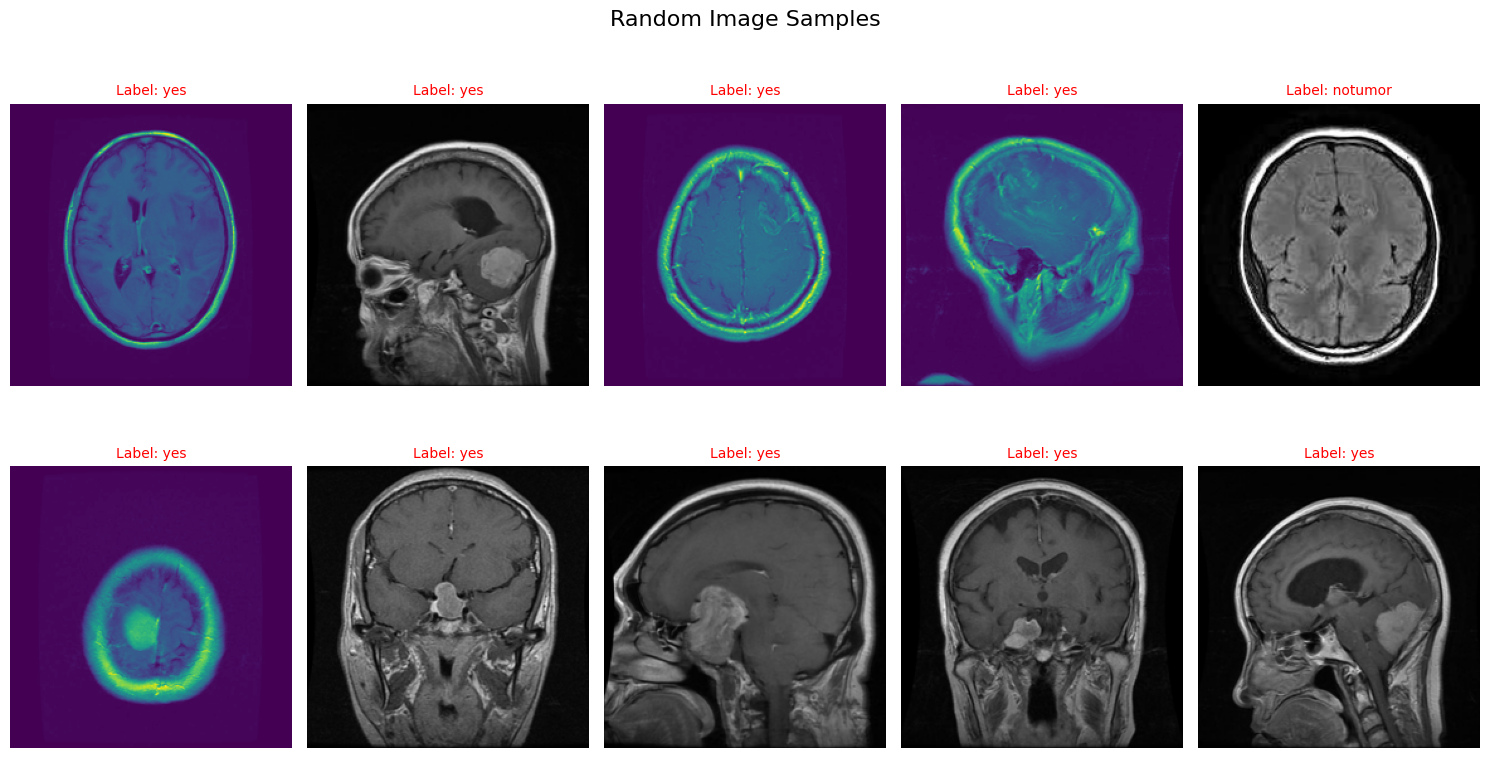

In [35]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

def visualize_random_images(train_paths, train_labels, num_images=10, figsize=(15, 8)):

    # Validate inputs
    if not train_paths or not train_labels:
        print("Error: Empty train_paths or train_labels list!")
        return

    if len(train_paths) != len(train_labels):
        print("Error: Mismatch between train_paths and train_labels lengths!")
        return

    # Check file existence and print out paths
    valid_paths = []
    valid_labels = []
    for path, label in zip(train_paths, train_labels):
        if os.path.exists(path):
            valid_paths.append(path)
            valid_labels.append(label)
        else:
            print(f"Warning: File not found - {path}")

    if not valid_paths:
        print("No valid image paths found!")
        return


    num_images = min(num_images, len(valid_paths))


    random_indices = random.sample(range(len(valid_paths)), num_images)


    rows = int(np.ceil(num_images / 5))
    cols = min(num_images, 5)

    plt.figure(figsize=figsize)

    for i, idx in enumerate(random_indices):
        plt.subplot(rows, cols, i+1)

        # Load image
        img_path = valid_paths[idx]
        try:
            img = Image.open(img_path)


            img = img.resize((224, 224))


            img_array = np.array(img)


            plt.imshow(img_array)
            plt.axis('off')


            label = valid_labels[idx]
            plt.title(f"Label: {label}", fontsize=10, color='red')

        except Exception as e:
            print(f"Error processing image {img_path}: {e}")


    plt.tight_layout()
    plt.suptitle('Random Image Samples', fontsize=16, y=1.02)
    plt.show()




print("Total number of train_paths:", len(train_paths))
print("First few paths:", train_paths[:5])
print("First few labels:", train_labels[:5])


visualize_random_images(train_paths, train_labels)

# Image Preprocessing (Helper Functions)

In [36]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

# Train Data Generator
train_ds = datagen.flow_from_directory(
    '/content/Training',
    target_size=(250, 250),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=42
)

# Validation Data Generator
validation_ds = val_datagen.flow_from_directory(
    '/content/Testing',
    target_size=(250, 250),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Print class information
print("Train Classes:", train_ds.class_indices)
print("Validation Classes:", validation_ds.class_indices)
print("Number of Training Samples:", train_ds.samples)
print("Number of Validation Samples:", validation_ds.samples)

Found 5712 images belonging to 2 classes.
Found 1311 images belonging to 2 classes.
Train Classes: {'notumor': 0, 'yes': 1}
Validation Classes: {'notumor': 0, 'yes': 1}
Number of Training Samples: 5712
Number of Validation Samples: 1311


In [37]:
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        print(f"Class '{class_name}' has {len(os.listdir(class_path))} images")


Class 'notumor' has 1595 images
Class 'yes' has 4117 images


In [38]:
!rm -r /content/Testing/.ipynb_checkpoints
!rm -r /content/Training/.ipynb_checkpoints



rm: cannot remove '/content/Testing/.ipynb_checkpoints': No such file or directory
rm: cannot remove '/content/Training/.ipynb_checkpoints': No such file or directory


# MODEL:

In [39]:
import os
import numpy as np
import tensorflow as tf
from PIL import Image, ImageEnhance
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


In [40]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [41]:
# covolution base from vgg16 for feature extraction
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(250, 250, 3))

In [42]:
conv_base.trainable = False
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 250, 250, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 250, 250, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 250, 250, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 125, 125, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 125, 125, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 125, 125, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 62, 62, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 62, 62, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 62, 62, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 31, 31, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 31, 31, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 31, 31, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 31, 31, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 15, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [43]:
# for fine tuning
conv_base.trainable = True
for layer in conv_base.layers[-4:]:
    layer.trainable = True

In [44]:
# model
# model = Sequential()
# model.add(conv_base)
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dense(1, activation='sigmoid'))

# model.summary()

model = Sequential()
model.add(conv_base)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

In [45]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,914,113 (56.89 MB)

 Trainable params: 14,913,089 (56.89 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [46]:
# adam = Adam(learning_rate=1e-5)
rmsprop = RMSprop(learning_rate=1e-5)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])


Started MLflow run with ID: a9b6447e7a1342aaaebe9bdf7b2e51e0


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 163s 750ms/step - accuracy: 0.7832 - loss: 0.4569 - val_accuracy: 0.9458 - val_loss: 0.3816
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 134s 723ms/step - accuracy: 0.9390 - loss: 0.2014 - val_accuracy: 0.9405 - val_loss: 0.2384
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 129s 719ms/step - accuracy: 0.9563 - loss: 0.1542 - val_accuracy: 0.9558 - val_loss: 0.1655
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 129s 718ms/step - accuracy: 0.9626 - loss: 0.1273 - val_accuracy: 0.9672 - val_loss: 0.1244
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 130s 723ms/step - accuracy: 0.9722 - loss: 0.1061 - val_accuracy: 0.9695 - val_loss: 0.1182


2025/04/28 17:15:22 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/04/28 17:15:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Training metrics and model logged to MLflow run: a9b6447e7a1342aaaebe9bdf7b2e51e0
🏃 View run brain_tumor_detection_vgg16 at: https://ml.reaai.me/#/experiments/1/runs/a9b6447e7a1342aaaebe9bdf7b2e51e0
🧪 View experiment at: https://ml.reaai.me/#/experiments/1


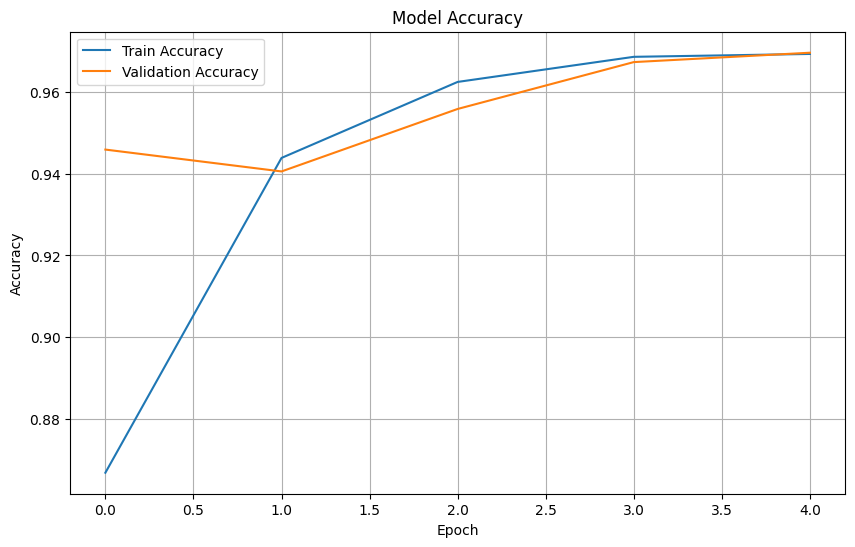

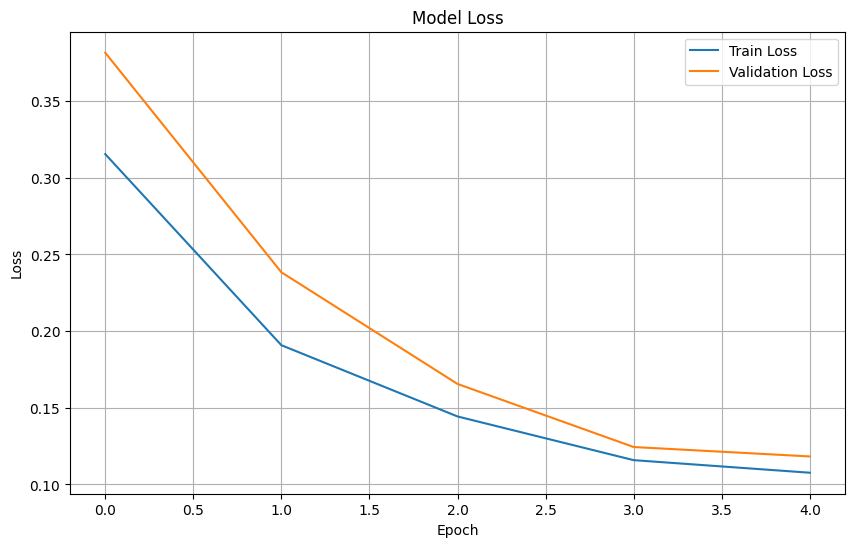

In [47]:
import mlflow
import matplotlib.pyplot as plt

# End any existing runs to start fresh
mlflow.end_run()

# Extract class names from the training data generator
class_names = list(train_ds.class_indices.keys())

# Start a new MLflow run
with mlflow.start_run(run_name="brain_tumor_detection_vgg16") as run:
    # Save the run ID for later use
    current_run_id = run.info.run_id
    print(f"Started MLflow run with ID: {current_run_id}")

    # Log parameters
    mlflow.log_param("optimizer", "RMSprop")
    mlflow.log_param("learning_rate", 1e-5)
    mlflow.log_param("epochs", 5)
    mlflow.log_param("batch_size", 32)
    mlflow.log_param("model_architecture", "VGG16")

    # Train the model
    history = model.fit(train_ds, epochs=5, validation_data=validation_ds)

    # Log metrics after each epoch
    for epoch in range(len(history.history['accuracy'])):
        mlflow.log_metric("train_accuracy", history.history['accuracy'][epoch], step=epoch)
        mlflow.log_metric("train_loss", history.history['loss'][epoch], step=epoch)
        mlflow.log_metric("val_accuracy", history.history['val_accuracy'][epoch], step=epoch)
        mlflow.log_metric("val_loss", history.history['val_loss'][epoch], step=epoch)

    # Log final metrics
    mlflow.log_metric("final_train_accuracy", history.history['accuracy'][-1])
    mlflow.log_metric("final_train_loss", history.history['loss'][-1])
    mlflow.log_metric("final_val_accuracy", history.history['val_accuracy'][-1])
    mlflow.log_metric("final_val_loss", history.history['val_loss'][-1])

    # Plot and log accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.savefig("accuracy_plot.png")
    mlflow.log_artifact("accuracy_plot.png")

    # Plot and log loss
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.savefig("loss_plot.png")
    mlflow.log_artifact("loss_plot.png")

    # Log the model
    mlflow.tensorflow.log_model(model, "model")

    print(f"Training metrics and model logged to MLflow run: {current_run_id}")

# Train and Val Plots

In [48]:
# # Plotting training and validation metrics
# import matplotlib.pyplot as plt


# print("Available keys in history:", history.history.keys())


# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)

# accuracy_key = 'accuracy' if 'accuracy' in history.history else 'sparse_categorical_accuracy'
# val_accuracy_key = 'val_accuracy' if 'val_accuracy' in history.history else 'val_sparse_categorical_accuracy'

# plt.plot(history.history[accuracy_key])
# plt.plot(history.history[val_accuracy_key])
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')


# plt.savefig("accuracy_plot.png")    # <--- Save plot
# mlflow.log_artifact("accuracy_plot.png")   # <--- Log plot to MLflow

# plt.show()




In [49]:
# import matplotlib.pyplot as plt

# # Plot training & validation loss
# plt.figure(figsize=(8, 6))
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.title('Train vs Validation Loss')

# plt.savefig("Train_vs_Validation_Loss")
# mlflow.log_artifact("Train_vs_Validation_Loss.png")


# plt.show()


# Model Classification Report

In [50]:
model.evaluate(validation_ds)

41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 220ms/step - accuracy: 0.9480 - loss: 0.1524


[0.11824741959571838, 0.9694889187812805]

# Model Confusion Plot

In [51]:
# Generate Classification Report
from sklearn.metrics import classification_report
import numpy as np


def get_predictions_and_labels(model, data_generator):

    data_generator.reset()


    true_labels = []
    for i in range(len(data_generator)):
        batch = data_generator[i]
        y_batch = batch[1]

        if data_generator.class_mode == 'binary':
            y_batch = y_batch.astype(int)

        true_labels.extend(y_batch)


    predictions = model.predict(data_generator, verbose=1)

    if len(predictions.shape) > 1 and predictions.shape[1] > 1:  # Multi-class case
        predicted_labels = np.argmax(predictions, axis=1)
    else:
        predicted_labels = (predictions > 0.5).astype(int).reshape(-1)

    return predicted_labels, np.array(true_labels)


pred_labels, true_labels = get_predictions_and_labels(model, validation_ds)


class_names = list(validation_ds.class_indices.keys())


print("Classification Report:")
print(classification_report(true_labels, pred_labels, target_names=class_names))

41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 243ms/step
Classification Report:
              precision    recall  f1-score   support

     notumor       0.94      0.96      0.95       405
         yes       0.98      0.97      0.98       906

    accuracy                           0.97      1311
   macro avg       0.96      0.97      0.96      1311
weighted avg       0.97      0.97      0.97      1311



Logging evaluation metrics to MLflow run: a9b6447e7a1342aaaebe9bdf7b2e51e0
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 228ms/step
Classification metrics logged successfully
🏃 View run brain_tumor_detection_vgg16 at: https://ml.reaai.me/#/experiments/1/runs/a9b6447e7a1342aaaebe9bdf7b2e51e0
🧪 View experiment at: https://ml.reaai.me/#/experiments/1


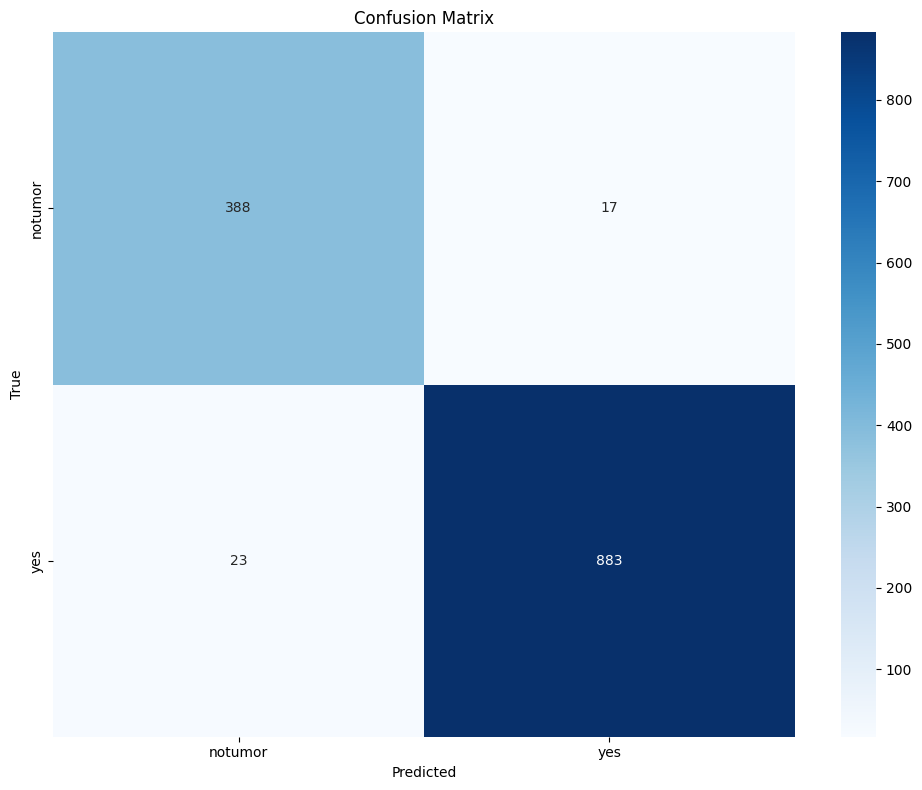

In [52]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure to use the same run ID for consistency
with mlflow.start_run(run_id=current_run_id):
    print(f"Logging evaluation metrics to MLflow run: {current_run_id}")

    # Get predictions
    validation_ds.reset()  # Reset dataset
    y_pred = model.predict(validation_ds)
    y_pred_classes = (y_pred > 0.5).astype("int32")  # For binary classification

    # Get true labels
    validation_ds.reset()  # Reset again to ensure correct order
    true_labels = validation_ds.classes

    # Generate confusion matrix
    cm = confusion_matrix(true_labels, y_pred_classes)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")

    # Log classification report
    report = classification_report(true_labels, y_pred_classes,
                                  target_names=class_names, output_dict=True)

    # Log precision, recall and f1-score
    for class_name in class_names:
        if class_name in report:
            mlflow.log_metric(f"precision_{class_name}", report[class_name]['precision'])
            mlflow.log_metric(f"recall_{class_name}", report[class_name]['recall'])
            mlflow.log_metric(f"f1_score_{class_name}", report[class_name]['f1-score'])

    # Log overall metrics
    mlflow.log_metric("accuracy", report['accuracy'])
    if 'macro avg' in report:
        mlflow.log_metric("macro_precision", report['macro avg']['precision'])
        mlflow.log_metric("macro_recall", report['macro avg']['recall'])
        mlflow.log_metric("macro_f1", report['macro avg']['f1-score'])

    print("Classification metrics logged successfully")

# Roc Curve Plot


Logging ROC curve to MLflow run: a9b6447e7a1342aaaebe9bdf7b2e51e0
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 230ms/step


ROC curve and AUC score logged successfully
MLflow run completed successfully!
🏃 View run brain_tumor_detection_vgg16 at: https://ml.reaai.me/#/experiments/1/runs/a9b6447e7a1342aaaebe9bdf7b2e51e0
🧪 View experiment at: https://ml.reaai.me/#/experiments/1


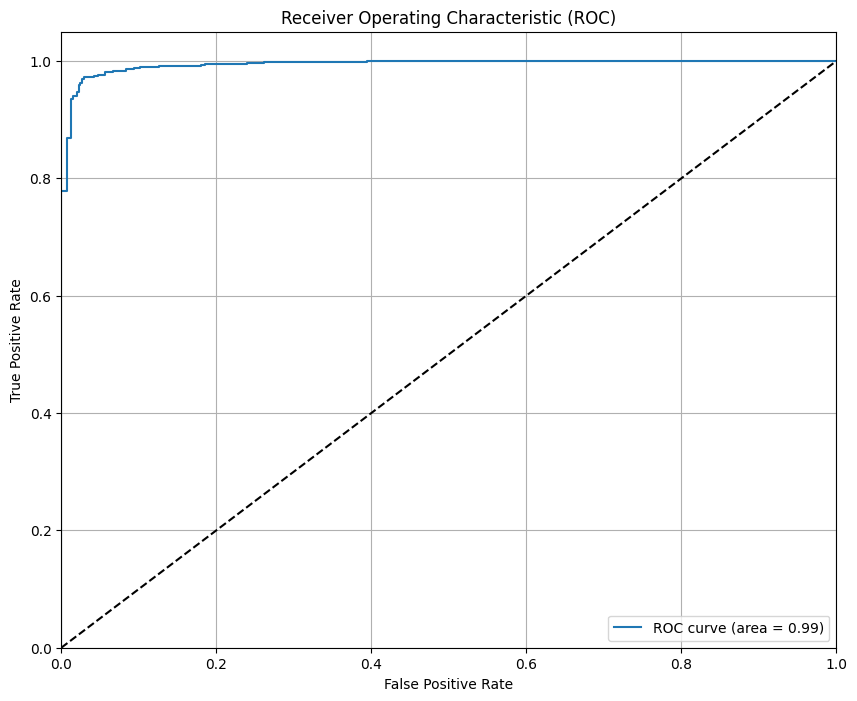

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Continue using the same run ID
with mlflow.start_run(run_id=current_run_id):
    print(f"Logging ROC curve to MLflow run: {current_run_id}")

    # Generate ROC curve
    validation_ds.reset()  # Reset dataset
    y_pred_proba = model.predict(validation_ds)

    # For binary classification
    fpr, tpr, _ = roc_curve(true_labels, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.savefig("roc_curve.png")
    mlflow.log_artifact("roc_curve.png")

    # Log AUC score
    mlflow.log_metric("auc_score", roc_auc)

    # Save the model locally
    model.save('brain_tumor_detection_model.h5')

    print("ROC curve and AUC score logged successfully")
    print("MLflow run completed successfully!")

# Save & Load Model

In [55]:

model.save('brain_tumor_detection_model.h5')
print("Model saved locally as 'brain_tumor_detection_model.h5'")

# Log model to MLflow - use the consistent run_id approach
try:
    # Try to use the existing run_id variable from our previous code blocks
    with mlflow.start_run(run_id=current_run_id):
        mlflow.tensorflow.log_model(model, "model")
        print(f"Model logged to existing MLflow run: {current_run_id}")
except Exception as e:
    # If current_run_id is not defined or there's another issue
    mlflow.end_run()  # Make sure no run is active
    with mlflow.start_run(run_name="brain_tumor_model_logging") as run:
        mlflow.tensorflow.log_model(model, "model")
        print(f"Model saved and logged to new MLflow run: {run.info.run_id}")

Model saved locally as 'brain_tumor_detection_model.h5'


2025/04/28 17:16:54 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/04/28 17:17:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model logged to existing MLflow run: a9b6447e7a1342aaaebe9bdf7b2e51e0
🏃 View run brain_tumor_detection_vgg16 at: https://ml.reaai.me/#/experiments/1/runs/a9b6447e7a1342aaaebe9bdf7b2e51e0
🧪 View experiment at: https://ml.reaai.me/#/experiments/1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')